# Block 1

In [1]:
# loaded the diabetes dataset
import pandas as pd
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = diabetes.target

# Block 2

In [2]:
# imported the other necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Block 3

In [3]:
# created a function that:
# a) takes X and y as the inputs
# b) gets the predicted y data for X test from the model
# c) fits a linear regression model to the training X and training y data
# d) gets the predicted y data for X test from the model
# e) outputs the model fit (R^2)

# a) takes X and y as the inputs
def model_fit(X, y):
  """
  purpose of function: find out how well different features in X predict y

  inputs: 
  X = a feature from the dataframe (the x values)
  y = the target data (the y values)
  """
  
  # b) splits the X and y into train and test using the train_test_split method
  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

  # c) fits a linear regression model to the training X and training y data
  model_data = LinearRegression() # initializes the model
  model_data.fit(X_train, y_train)

  # d) gets the predicted y data for X test from the model
  y_predicted = model_data.predict(X_test)

  # e) outputs the model fit (R^2)
  training_r_sqr = model_data.score(X_train, y_train) # for training data
  test_r_sqr = model_data.score(X_test, y_test) # for testing data

  return 'Training R^2:', training_r_sqr, 'Testing R^2:', test_r_sqr

# Block 4

In [4]:
# shows that the model_fit function works using the feature 'age'
print('age:', model_fit(X[['age']], y))

age: ('Training R^2:', 0.045384727639879774, 'Testing R^2:', -0.011092244658333694)


# Block 5

In [5]:
# using the function, find the best single feature (i.e., column) in X that best predicts y
# aka from the testing data, find the highest R^2 and get the name of the column associated w/ it

features_r_sqr_testing = [(model_fit(X[[i]], y)[3], i) for i in X.columns] 
best_feature = max(features_r_sqr_testing)
print(best_feature)

(0.29630801377437443, 's5')


# Block 6

('Training R^2:', 0.32597994540659747, 'Testing R^2:', 0.29630801377437443)


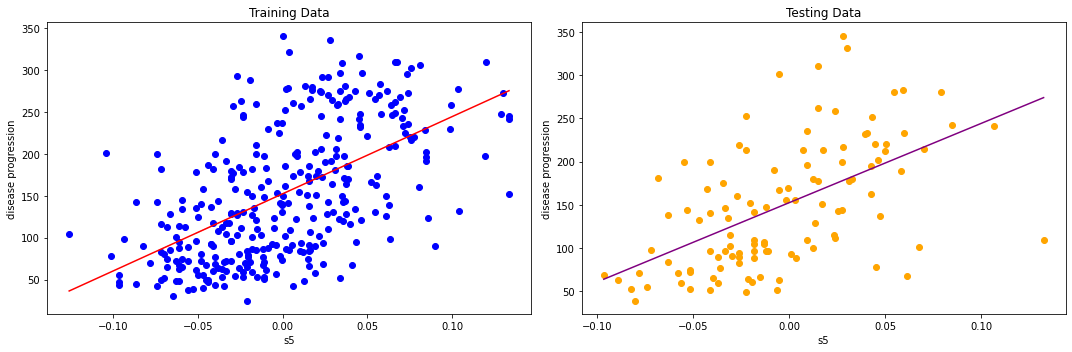

In [6]:
# using object-oriented programming, make a figure that has 2 subplots (training data on the left and testing data on the right - both as scatterplots)
# include the best fitting model line in both plots and include the R^2 value in both plots for the different fits
for i in best_feature:
  # if the item in 'best_feature' is a string:
  if isinstance(i, str):
    # call the model_fit function from block 3 to get the training and testing R^2 values
    print(model_fit(X[[i]], y))

    # split the X and y into train and test using the train_test_split method
    X_train, X_test, y_train, y_test = train_test_split(X[[i]], y, random_state=1)

    # fit a linear regression model to the training X and training y data
    model = LinearRegression() # initializes the model
    model.fit(X_train, y_train)

    # get the predicted y data for X test from the model
    y_predicted = model.predict(X_test)

    # create subplots for training and testing data
    best_feature_fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[15, 5])

    # training data subplot (on the left)
    axes[0].scatter(X_train[X_train.columns[0]], y_train, color='blue')
    sns.lineplot(x=X_train[X_train.columns[0]], y=model.predict(X_train), color='red', ax=axes[0])
    axes[0].set_title('Training Data')

    # testing data subplot (on the right)
    axes[1].scatter(X_test[X_test.columns[0]], y_test, color='orange')
    sns.lineplot(x=X_test[X_test.columns[0]], y=y_predicted, color='purple', ax=axes[1])
    axes[1].set_title('Testing Data')

    # set y label for both subplots
    for i in best_feature_fig.axes:
      i.set_ylabel('disease progression')

    plt.tight_layout()
    plt.show()

# Block 7: Extra Credit

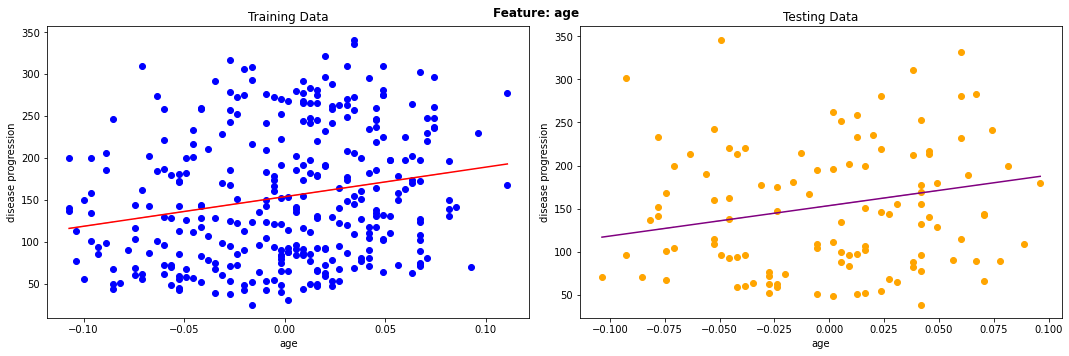

Training R^2: 0.045384727639879774 , Testing R^2: -0.011092244658333694


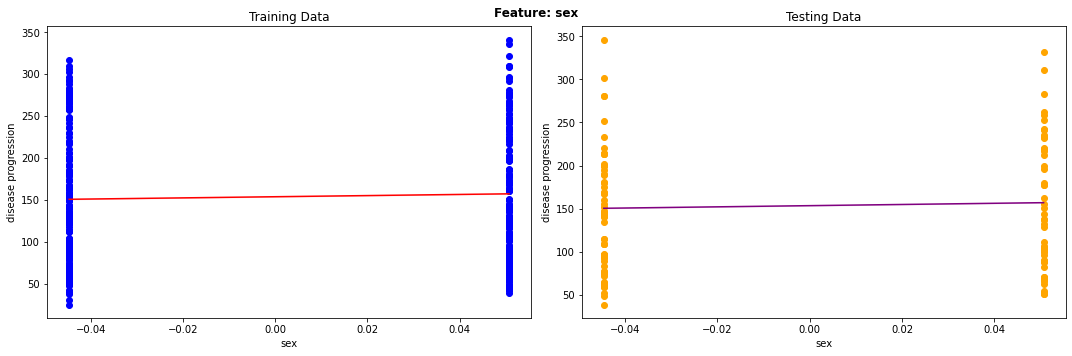

Training R^2: 0.0017198871797380333 , Testing R^2: -0.004657205501040096


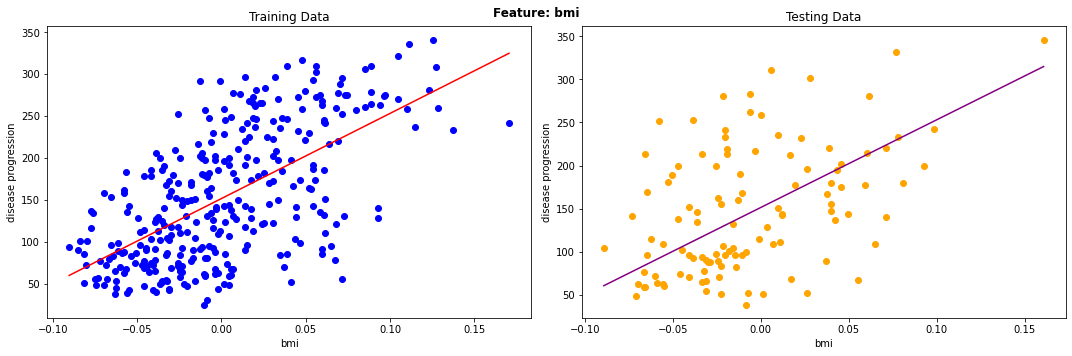

Training R^2: 0.38880250430560737 , Testing R^2: 0.17466209865339177


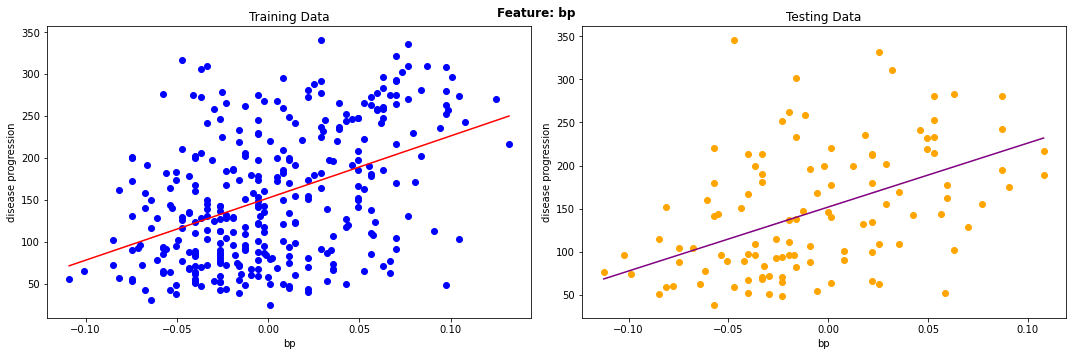

Training R^2: 0.1964839686305333 , Testing R^2: 0.18390082705313726


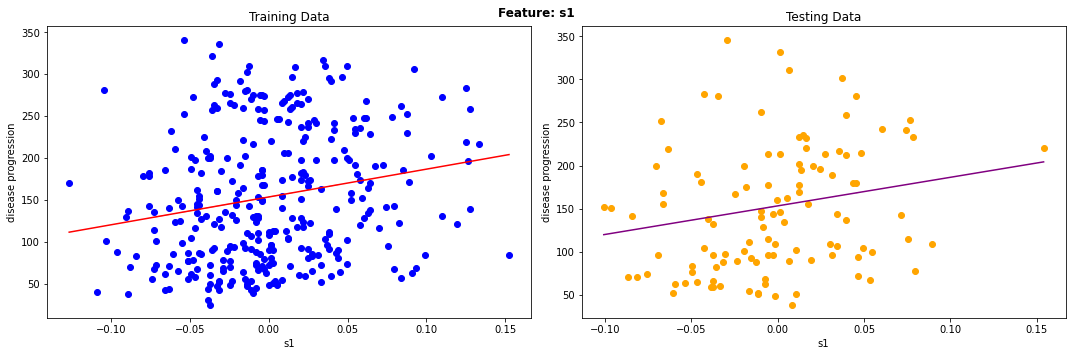

Training R^2: 0.04168667199614595 , Testing R^2: 0.05003179316202577


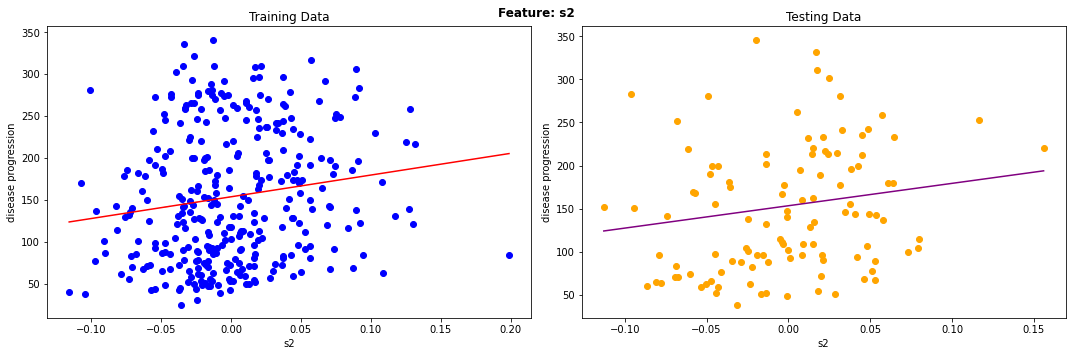

Training R^2: 0.02470761499669738 , Testing R^2: 0.04248875852908429


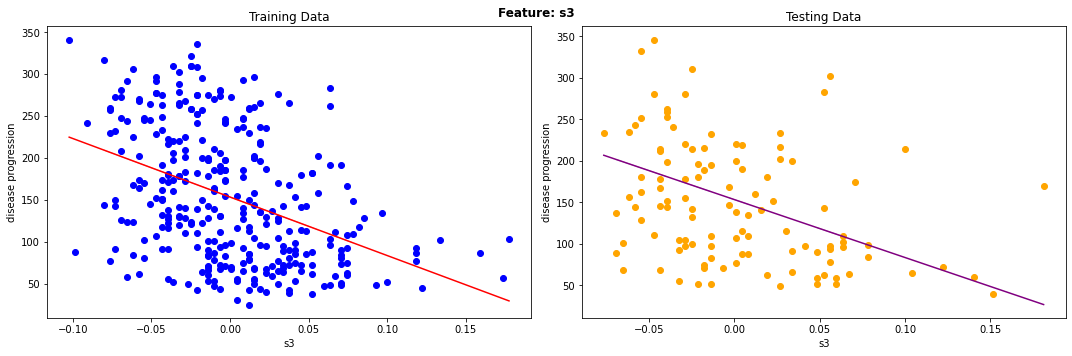

Training R^2: 0.17017321772012173 , Testing R^2: 0.09411124480311595


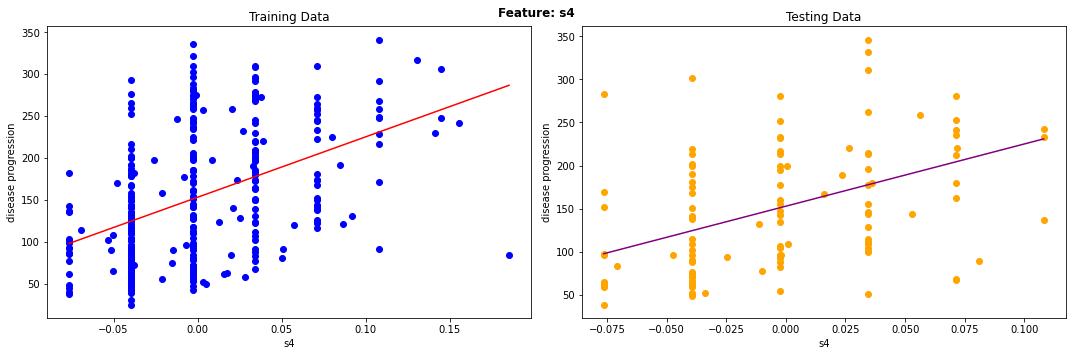

Training R^2: 0.19338632561329683 , Testing R^2: 0.15094928794177753


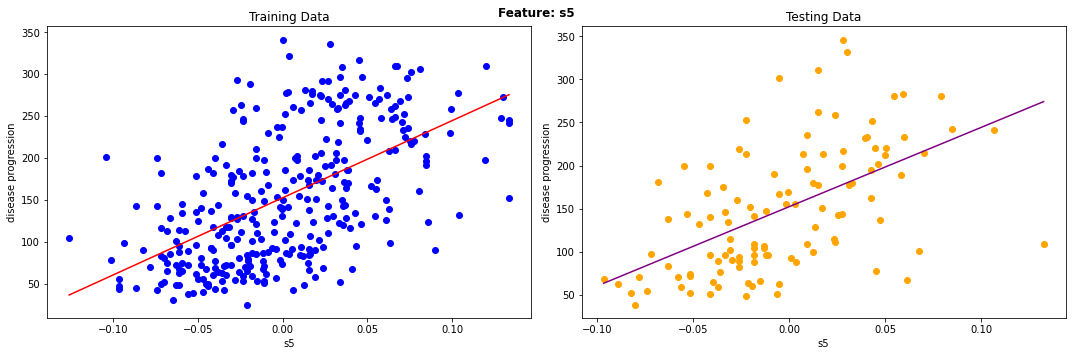

Training R^2: 0.32597994540659747 , Testing R^2: 0.29630801377437443


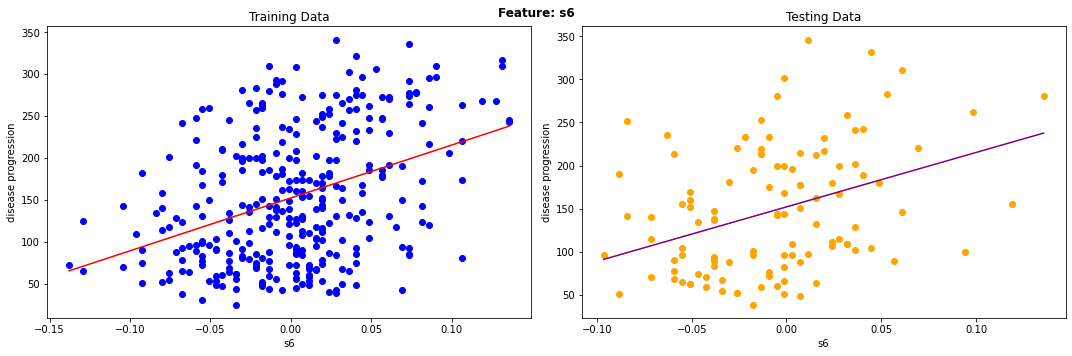

Training R^2: 0.15228926762626183 , Testing R^2: 0.12046966383556679
Feature in X that best predicts y: (0.29630801377437443, 's5')


In [9]:
# updated the model_fit function from block 3 to create plots inside of the function
# a) takes X and y as the inputs
def model_fit_with_plots(X, y):
  # --- from block 3 ---
  """
  purpose of function: find out how well different features in X predict y

  inputs: 
  X = a feature from the dataframe (the x values)
  y = the target data (the y values)
  """
  
  # b) splits the X and y into train and test using the train_test_split method
  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

  # c) fits a linear regression model to the training X and training y data
  model_data = LinearRegression() # initializes the model
  model_data.fit(X_train, y_train)

  # d) gets the predicted y data for X test from the model
  y_predicted = model_data.predict(X_test)

  # e) outputs the model fit (R^2)
  training_r_sqr = model_data.score(X_train, y_train) # for training data
  test_r_sqr = model_data.score(X_test, y_test) # for testing data
  
  # --- from block 6 ---

  # created subplots for training and testing data
  diabetes_fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[15, 5])

  # title of the plot is the name of the feature
  diabetes_fig.suptitle('Feature: ' + str(X_train.columns[0]), fontweight='bold')

  # training data subplot (on the left)
  axes[0].scatter(X_train[X_train.columns[0]], y_train, color='blue')
  sns.lineplot(x=X_train[X_train.columns[0]], y=model_data.predict(X_train), color='red', ax=axes[0])
  axes[0].set_title('Training Data')
  
  # testing data subplot (on the right)
  axes[1].scatter(X_test[X_test.columns[0]], y_test, color='orange')
  sns.lineplot(x=X_test[X_train.columns[0]], y=y_predicted, color='purple', ax=axes[1])
  axes[1].set_title('Testing Data')

  # set y label for both subplots
  for i in diabetes_fig.axes:
    i.set_ylabel('disease progression')

  plt.tight_layout()
  plt.show()

  print('Training R^2:', training_r_sqr, ', Testing R^2:', test_r_sqr)

# --- did blocks 5 and 6 inside of a for loop ---
# created an empty list to store the feature name and its testing R^2 value
testing_r_sqr_list = []

for i in X.columns:
  # for block 6: called the model_fit_with_plots function 
  model_fit_with_plots(X[[i]], y)

  # for block 5: created a variable w/ the feature name and its R^2 for the testing data
  feature_and_r_sqr = model_fit(X[[i]], y)[3], i

  # for block 5: appended the tuple containing the feature name and its testing R^2 to the list
  testing_r_sqr_list.append(feature_and_r_sqr)

# for block 5: printed the name of the feature w/ the highest R^2 score and its R^2 value 
print('Feature in X that best predicts y:', max(testing_r_sqr_list))